In [1]:
# import matplotlib.font_manager as fm
# font_list = [f.name for f in fm.fontManager.ttflist]
# pprint(font_list)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from pprint import pprint
from typing import List, Tuple, Dict, Union, Optional
# plt.rcParams["font.family"] = "Arial" # "Hiragino Sans"  # "Arial" # "Times New Roman"      #全体のフォントを設定
# plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線を内向きへ
# plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線を内向きへ
# plt.rcParams["xtick.minor.visible"] = True           #x軸補助目盛りの追加
# plt.rcParams["ytick.minor.visible"] = True           #y軸補助目盛りの追加
# # plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
# # plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
# # plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
# # plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
# plt.rcParams["xtick.major.size"] = 10                #x軸主目盛り線の長さ
# plt.rcParams["ytick.major.size"] = 10                #y軸主目盛り線の長さ
# plt.rcParams["xtick.minor.size"] = 5                 #x軸補助目盛り線の長さ
# plt.rcParams["ytick.minor.size"] = 5                 #y軸補助目盛り線の長さ
# plt.rcParams["font.size"] = 25                       #フォントの大きさ
# plt.rcParams["axes.linewidth"] = 1.25                 #囲みの太さ
# plt.rcParams["figure.figsize"] = [5, 4]
# # 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
# # ax.tick_params(direction="in", length=10, colors="black", width=1)
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
import sys
sys.path.append('..')

from src.igor import Igor

In [6]:
data = {

    "sample": ["1354", "1360", "1364", "1365", "1362", "1369", "1370","1361", "1357"],
    "dirname": ["230525_#1-1354", "230719_#1-1359_#1-1360", "231003_#1-1364_#1-1365", "231003_#1-1364_#1-1365", "230726_#1-1362", "231018_#1-1369_#1-1370", "231018_#1-1369_#1-1370", "230720_#1-1361_#2-1421", "230628_#1-1357(CBST)"],
    "x": [0.0, 0.008, 0.012, 0.016, 0.02, 0.03, 0.04, 0.05, 0.08],
    "MIN_X": [0, 0, 0, 0, 0, 0, 0, 0, 0],
    "MAX_X": [300, 300, 300, 300, 300, 300, 300, 300, 300],
    "X_STEP": [100, 100, 100, 100, 100, 100, 100, 100, 100],
    "SUB_X_STEP" : [],
    "MIN_Y": [-0.125, -100, -100, -100, -500, -250, -250, -100, -10],
    "MAX_Y": [1, 2000, 7000, 3000, 4500, 1000, 1000, 400, 200],
    "Y_STEP": [0.25, 500, 1000, 500, 1000, 250, 250, 200, 50],
    "SUB_Y_STEP" : [],
    "T_C": []
}
for i in range(len(data["sample"])):
    data["SUB_X_STEP"].append(data["X_STEP"][i] / 2)
    data["SUB_Y_STEP"].append(data["Y_STEP"][i] / 2)
T_C_threshold = 0.015

In [7]:
data

{'sample': ['1354',
  '1360',
  '1364',
  '1365',
  '1362',
  '1369',
  '1370',
  '1361',
  '1357'],
 'dirname': ['230525_#1-1354',
  '230719_#1-1359_#1-1360',
  '231003_#1-1364_#1-1365',
  '231003_#1-1364_#1-1365',
  '230726_#1-1362',
  '231018_#1-1369_#1-1370',
  '231018_#1-1369_#1-1370',
  '230720_#1-1361_#2-1421',
  '230628_#1-1357(CBST)'],
 'x': [0.0, 0.008, 0.012, 0.016, 0.02, 0.03, 0.04, 0.05, 0.08],
 'MIN_X': [0, 0, 0, 0, 0, 0, 0, 0, 0],
 'MAX_X': [300, 300, 300, 300, 300, 300, 300, 300, 300],
 'X_STEP': [100, 100, 100, 100, 100, 100, 100, 100, 100],
 'SUB_X_STEP': [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
 'MIN_Y': [-0.125, -100, -100, -100, -500, -250, -250, -100, -10],
 'MAX_Y': [1, 2000, 7000, 3000, 4500, 1000, 1000, 400, 200],
 'Y_STEP': [0.25, 500, 1000, 500, 1000, 250, 250, 200, 50],
 'SUB_Y_STEP': [0.125, 250.0, 500.0, 250.0, 500.0, 125.0, 125.0, 100.0, 25.0],
 'T_C': []}

In [8]:
def plot(x, y, label, xlabel, ylabel, MIN_X, MAX_X, X_STEP, SUB_X_STEP, MIN_Y, MAX_Y, Y_STEP, SUB_Y_STEP, savepath, hlines=True, figsize=(5, 4), markersize=5, linewidth=2, title="", suffix=""):
    """
    """

    # Figureを設定
    fig = plt.figure(figsize=figsize)
    # Axesを追加
    ax = fig.add_subplot(111)
    x, y = np.array(x), np.array(y)
    # sort
    x, y = x[np.argsort(x)], y[np.argsort(x)]
    ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
    if hlines:
        ax.hlines(0, 0, MAX_Y, color='black', linestyles='dotted')
    else:
        pass

    # plt.show()
    # Axesのタイトルの設定
    ax.set_title(title)
    # 軸ラベルの設定
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # x軸の目盛設定
    ax.set_xlim(MIN_X, MAX_X + 1e-3)
    ax.set_xticks(np.arange(MIN_X, MAX_X + 1e-3, step=X_STEP))
    # y軸の目盛設定
    ax.set_ylim(MIN_Y, MAX_Y + 1e-3)
    ax.set_yticks(np.arange(0, MAX_Y + 1e-3, step=Y_STEP))
    # 副目盛りの設定
    ax.minorticks_on()
    ax.tick_params(which="minor", direction="in", length=5, colors="black")
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
    ax.set_yticks(np.arange(0, MAX_Y, step=SUB_Y_STEP), minor=True)
    savepath = savepath.replace(".png", f"{suffix}.png")
    plt.savefig(savepath, dpi=300, bbox_inches='tight', transparent=True)


def plot_rho_yx_T(
    data: Dict[str, List[Union[str, float]]],
    T_C_threshold: float = 0.0
) -> None:
    """
    """
    for i in range(len(data["sample"])):
        SAMPLE = data["sample"][i]
        dirname = data["dirname"][i]
        MIN_X = data["MIN_X"][i]
        MAX_X = data["MAX_X"][i]
        X_STEP = data["X_STEP"][i]
        SUB_X_STEP = data["SUB_X_STEP"][i]
        MIN_Y = data["MIN_Y"][i]
        MAX_Y = data["MAX_Y"][i]
        Y_STEP = data["Y_STEP"][i]
        SUB_Y_STEP = data["SUB_Y_STEP"][i]

        dirpath = Path(f"/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS/{dirname}/{SAMPLE}")
        savepath = f"/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS/{dirname}/{SAMPLE}/Ryx_temp_{SAMPLE}.png"
        df = pd.read_csv(dirpath / "temp_dep.csv")
        if i==0:
            plot(
                df["temps"].values, df["I_Ryx"].values, label="",
                xlabel="$T$ (K)", ylabel="$R_{yx}$ (Ω)", title=f"#1-{SAMPLE}", 
                MIN_X=MIN_X, MAX_X=MAX_X, X_STEP=X_STEP,
                SUB_X_STEP=SUB_X_STEP, MIN_Y=MIN_Y, MAX_Y=MAX_Y, Y_STEP=Y_STEP, SUB_Y_STEP=SUB_Y_STEP, savepath=savepath, hlines=True
            )
        else:
            plot(
                df["temps"].values, df["RyxA"].values, label="",
                xlabel="$T$ (K)", ylabel="$R_{yx}$ (Ω)", title=f"#1-{SAMPLE}",
                MIN_X=MIN_X, MAX_X=MAX_X, X_STEP=X_STEP,
                SUB_X_STEP=SUB_X_STEP, MIN_Y=MIN_Y, MAX_Y=MAX_Y, Y_STEP=Y_STEP, SUB_Y_STEP=SUB_Y_STEP, savepath=savepath, hlines=True
            )

        # # 初めrてRyxAが0を下回る温度を求める
        # # T_C = df[df["RyxA_norm"] <= T_c_threshold].iloc[0, 0]
        if i == 0:
            T_C = 0.0
        else:
            try:
                T_C = df[df["RyxA_norm"] <= T_C_threshold].iloc[0, 0]
            except IndexError:
                # なかった場合は温度の最小値とその温度を出力
                T_C = df["temps"].min()
                print(f"{SAMPLE} : {T_C} K")
        data["T_C"].append(T_C)
        print("T_C = ", T_C)


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  0.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  14.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  16.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  25.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  50.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


1369 : 2.0 K
T_c =  2.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  130.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  160.0


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


T_c =  200.0


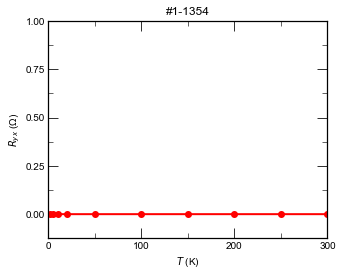

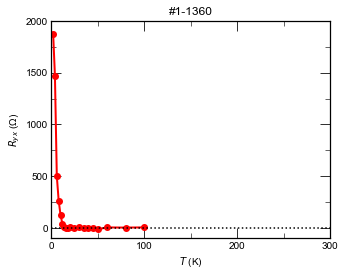

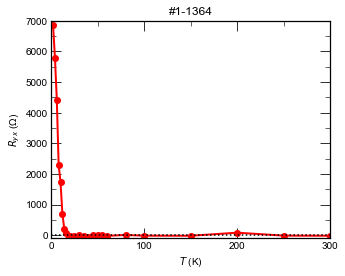

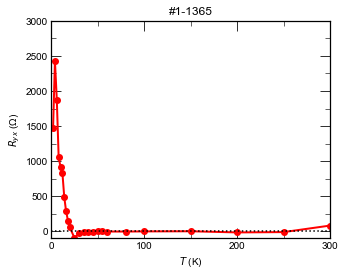

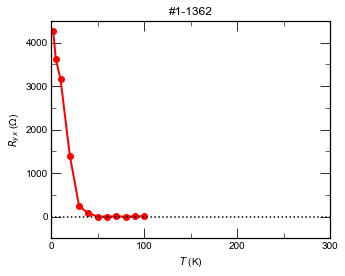

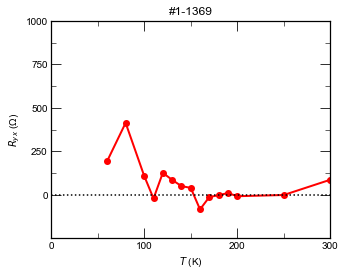

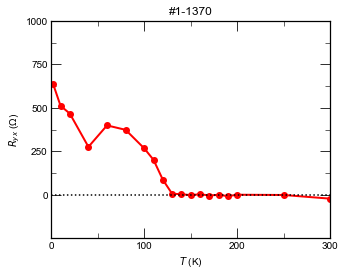

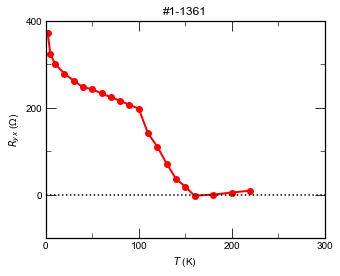

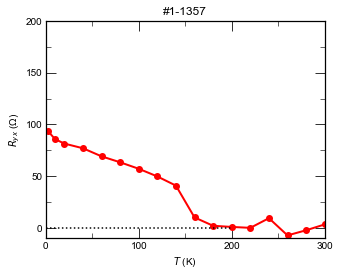

In [9]:
plot_rho_yx_T(data, T_C_threshold)

In [12]:
data["T_C"][-4] = 120
data["T_C"][-3] = 150


<ipython-input-8-0bf6b69df72e>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=markersize, linewidth=linewidth, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


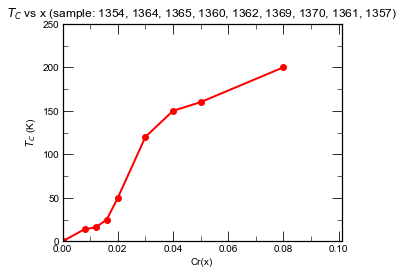

In [15]:

MIN_X = 0
MAX_X = 0.1001
X_STEP = 0.02
SUB_X_STEP = X_STEP /2
MIN_Y = 0
MAX_Y = 250.001
Y_STEP = 50
SUB_Y_STEP = 25
savepath = f"/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS/summary/TC_x.png"
title = "$T_C$ vs x (sample: 1354, 1364, 1365, 1360, 1362, 1369, 1370, 1361, 1357)"

plot(data["x"], data["T_C"], label="", title=title, xlabel="Cr(x)", ylabel="$T_C$ (K)", 
     MIN_X=MIN_X, MAX_X=MAX_X, X_STEP=X_STEP, SUB_X_STEP=SUB_X_STEP, 
     MIN_Y=MIN_Y, MAX_Y=MAX_Y, Y_STEP=Y_STEP, SUB_Y_STEP=SUB_Y_STEP, savepath=savepath, hlines=False, figsize=(5,4),
     suffix=""
)


# c軸長を求めたい

参考：The unit size of a QL is 10.17  Å in the case of Bi2Te3.

In [7]:
data["006_center_2theta"] = [8.693, 8.693, 8.754, 8.730, 8.781, 8.846, 8.844] # ちゃんと2で割っている値
data["0015_center_2theta"] = [22.265, 22.258, 22.334, 22.341, 22.438, 22.597, 22.629]

In [28]:


def detect_c_axis_length(data: Dict, target="006"):
    """(006) or (0015)中心のthetaをθ_0，c軸長をd，x線の波長をλとすると，以下の式が成り立つ．
    d = λ / (2 * sin(θ_0 / 2))
    この式を用いてc軸長を計算する．

    Args:
        data (Dict): _description_
    """
    new_data = data.copy()
    new_data[f"c_axis_length_{target}"] = []
    xrd_lambda = 1.540598  # Kα（カッパアルファ1）の波長
    for i in range(len(data["sample"])):
        theta_0 = data[f"{target}_center_2theta"][i]
        d = (3/5)*(xrd_lambda / (2 * np.sin(np.deg2rad(theta_0))))
        if target == "006":
            d = d
        elif target == "0015":
            d = d * (5/2)
        new_data[f"c_axis_length_{target}"].append(d)
    return new_data


new_data = detect_c_axis_length(data, target="006")
new_data = detect_c_axis_length(new_data, target="0015")

In [29]:
new_data

{'sample': ['1354', '1360', '1364', '1365', '1362', '1361', '1357'],
 'dirname': ['230525_#1-1354',
  '230719_#1-1359_#1-1360',
  '231003_#1-1364_#1-1365',
  '231003_#1-1364_#1-1365',
  '230726_#1-1362',
  '230720_#1-1361_#2-1421',
  '230628_#1-1357(CBST)'],
 'x': [0.0, 0.008, 0.012, 0.016, 0.02, 0.05, 0.08],
 'MIN_X': [0, 0, 0, 0, 0, 0, 0],
 'MAX_X': [300, 300, 300, 300, 300, 300, 300],
 'X_STEP': [100, 100, 100, 100, 100, 100, 100],
 'SUB_X_STEP': [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
 'MIN_Y': [-0.125, -100, -100, -100, -500, -100, -10],
 'MAX_Y': [1, 2000, 1000, 3000, 4500, 400, 200],
 'Y_STEP': [0.25, 500, 100, 500, 1000, 200, 50],
 'SUB_Y_STEP': [0.125, 250.0, 50.0, 250.0, 500.0, 100.0, 25.0],
 'T_C': [0.0, 14.0, 16.0, 25.0, 50.0, 160.0, 200.0],
 '006_center_2theta': [8.693, 8.693, 8.754, 8.73, 8.781, 8.846, 8.844],
 '0015_center_2theta': [22.265,
  22.258,
  22.334,
  22.341,
  22.438,
  22.597,
  22.629],
 'c_axis_length_006': [3.0579544897032505,
  3.0579544897032505,
  

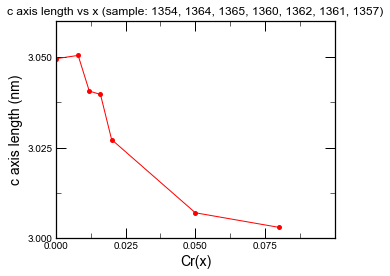

In [30]:

fig = plt.figure(figsize=(5, 4))
# 4つのグラフを描画
ax = fig.add_subplot(111)

# # sort
# x = np.array(new_data["x"])
# x = x[np.argsort(x)]
# y = np.array(new_data["c_axis_length_0015"])
# y = y[np.argsort(x)]

ax.plot(new_data["x"], new_data["c_axis_length_0015"], color="red", marker="o", linestyle="-", markersize=3, linewidth=1, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
# ax.plot(new_data["006_center_2theta"], ], label="006_center_2theta", color="red", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
# ax.plot(new_data["x"], new_data["0015_center_2theta"], label="0015_center_2theta", color="blue", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="blue", markeredgewidth=2, markeredgecolor="blue", markerfacecoloralt="blue")  # , x="x", y="fwhm")
# # plt.legend()

# ax.set_xlabel("(006) peak $\theta$ (degree)", size=14, weight="light")
ax.set_xlabel("Cr(x)", size=14, weight="light")
ax.set_ylabel("c axis length (nm)", size=14, weight="light")
# ax.set_title("c axis length vs x", fontsize=16)

MIN_X = 0
MAX_X = 0.1
X_STEP = 0.025
SUB_X_STEP = 0.0125
MIN_Y = 3.0
MAX_Y = 3.06
Y_STEP = 0.025
SUB_Y_STEP = 0.0125
# x軸の目盛設定
ax.set_xlim(MIN_X, MAX_X)
ax.set_xticks(np.arange(MIN_X, MAX_X, step=X_STEP))
# y軸の目盛設定
ax.set_ylim(MIN_Y, MAX_Y)
ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=Y_STEP))
# 副目盛りの設定
ax.minorticks_on()
ax.tick_params(which="minor", direction="in", length=5, colors="black")
ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=SUB_Y_STEP), minor=True)
# メモリを上下左右に設定
# 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
ax.tick_params(direction="in", length=10, colors="black", width=1)
# ax.secondary_xaxis('top')
# ax.secondary_yaxis('right')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
title = "c axis length vs x (sample: 1354, 1364, 1365, 1360, 1362, 1361, 1357)"
ax.set_title(title)
plt.savefig(f"/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS/summary/cAxisLength_x.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# ax.plot(new_data["0015_center_2theta"], new_data["c_axis_length_0015"], label="0015_center_2theta", color="blue", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="blue", markeredgewidth=2, markeredgecolor="blue", markerfacecoloralt="blue")  # , x="x", y="fwhm")


In [31]:
new_data

{'sample': ['1354', '1360', '1364', '1365', '1362', '1361', '1357'],
 'dirname': ['230525_#1-1354',
  '230719_#1-1359_#1-1360',
  '231003_#1-1364_#1-1365',
  '231003_#1-1364_#1-1365',
  '230726_#1-1362',
  '230720_#1-1361_#2-1421',
  '230628_#1-1357(CBST)'],
 'x': [0.0, 0.008, 0.012, 0.016, 0.02, 0.05, 0.08],
 'MIN_X': [0, 0, 0, 0, 0, 0, 0],
 'MAX_X': [300, 300, 300, 300, 300, 300, 300],
 'X_STEP': [100, 100, 100, 100, 100, 100, 100],
 'SUB_X_STEP': [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
 'MIN_Y': [-0.125, -100, -100, -100, -500, -100, -10],
 'MAX_Y': [1, 2000, 1000, 3000, 4500, 400, 200],
 'Y_STEP': [0.25, 500, 100, 500, 1000, 200, 50],
 'SUB_Y_STEP': [0.125, 250.0, 50.0, 250.0, 500.0, 100.0, 25.0],
 'T_C': [0.0, 14.0, 16.0, 25.0, 50.0, 160.0, 200.0],
 '006_center_2theta': [8.693, 8.693, 8.754, 8.73, 8.781, 8.846, 8.844],
 '0015_center_2theta': [22.265,
  22.258,
  22.334,
  22.341,
  22.438,
  22.597,
  22.629],
 'c_axis_length_006': [3.0579544897032505,
  3.0579544897032505,
  

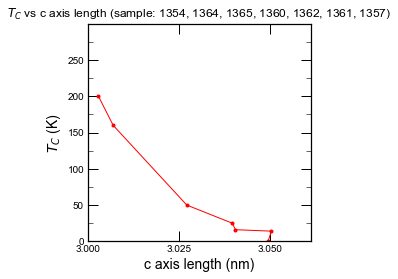

In [32]:

fig = plt.figure(figsize=(4, 4))
# 4つのグラフを描画
ax = fig.add_subplot(111)

ax.plot(new_data["c_axis_length_0015"], new_data["T_C"], color="red", marker="o", linestyle="-", markersize=2, linewidth=1, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
# ax.plot(new_data["006_center_2theta"], ], label="006_center_2theta", color="red", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
# ax.plot(new_data["x"], new_data["0015_center_2theta"], label="0015_center_2theta", color="blue", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="blue", markeredgewidth=2, markeredgecolor="blue", markerfacecoloralt="blue")  # , x="x", y="fwhm")
# # plt.legend()

# ax.set_xlabel("(006) peak $\theta$ (degree)", size=14, weight="light")

ax.set_xlabel("c axis length (nm)", size=14, weight="light")
ax.set_ylabel("$T_C$ (K)", size=14, weight="light")
# ax.set_title("$T_C$ vs c axis length", fontsize=16)

MIN_X = 3.0
MAX_X = 3.06125
X_STEP = 0.025
SUB_X_STEP = 0.025
MIN_Y = 0
MAX_Y = 300
Y_STEP = 50
SUB_Y_STEP = 25

# x軸の目盛設定
ax.set_xlim(MIN_X, MAX_X)
ax.set_xticks(np.arange(MIN_X, MAX_X, step=X_STEP))
# y軸の目盛設定
ax.set_ylim(MIN_Y, MAX_Y)
ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=Y_STEP))
# 副目盛りの設定
ax.minorticks_on()
ax.tick_params(which="minor", direction="in", length=5, colors="black")
ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
ax.set_yticks(np.arange(MIN_Y, MAX_Y, step=SUB_Y_STEP), minor=True)
# メモリを上下左右に設定
# 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
ax.tick_params(direction="in", length=10, colors="black", width=1)
# ax.secondary_xaxis('top')
# ax.secondary_yaxis('right')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# pprint(new_data)
title = "$T_C$ vs c axis length (sample: 1354, 1364, 1365, 1360, 1362, 1361, 1357)"
ax.set_title(title)
plt.savefig(f"/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS/summary/TC_cAxisLength.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

# ax.plot(new_data["0015_center_2theta"], new_data["c_axis_length_0015"], label="0015_center_2theta", color="blue", marker="o", linestyle="-", markersize=5, linewidth=2, markerfacecolor="blue", markeredgewidth=2, markeredgecolor="blue", markerfacecoloralt="blue")  # , x="x", y="fwhm")
